In [2]:
# LightGBM 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## categorization

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data_008.csv',  encoding = 'CP949')

In [5]:
df1 = df.iloc[:,:7]
df2 = pd.DataFrame()
df3 = df.iloc[:,173:]
df4 = pd.DataFrame()

In [6]:
df2['merchandise'] = df.iloc[:,19:28].sum(axis=1) + df.iloc[:,38]
df2['EC'] = df.iloc[:,39:41].sum(axis=1) + df.iloc[:,67:69].sum(axis=1) + df.iloc[:,140]
df2['groceries'] = df.iloc[:,28:38].sum(axis=1) + df.iloc[:,157]
df2['clothing_goods'] = df.iloc[:,69:85].sum(axis=1) + df.iloc[:,101:103].sum(axis=1) + df.iloc[:,158:160].sum(axis=1)
df2['fuel'] = df.iloc[:,167:171].sum(axis=1)
df2['furniture/appliances'] = df.iloc[:,49:57].sum(axis=1) + df.iloc[:,58:60].sum(axis=1)+  df.iloc[:,62] + df.iloc[:,64] + df.iloc[:,156]
df2['medical/health'] = df.iloc[:,145:155].sum(axis=1)
df2['vehicle'] = df.iloc[:,163:167].sum(axis=1) + df.iloc[:,125] + df.iloc[:,139] + df.iloc[:,141] + df.iloc[:,171:173].sum(axis=1)
df2['trip/traffic'] = df.iloc[:,12:18].sum(axis=1) + df.iloc[:,124]
df2['entertainment/culture'] = df.iloc[:,85:98].sum(axis=1) + df.iloc[:,103:112].sum(axis=1) + df.iloc[:,126:128].sum(axis=1) + df.iloc[:,143:145].sum(axis=1)
df2['education'] = df.iloc[:,63] + df.iloc[:,65:67].sum(axis=1) + df.iloc[:,100] + df.iloc[:,114] + df.iloc[:,128:130].sum(axis=1) + df.iloc[:,161:163].sum(axis=1)
df2['accommodation/food'] = df.iloc[:,7:12].sum(axis=1) + df.iloc[:,41:49].sum(axis=1) + df.iloc[:,126:128].sum(axis=1) + df.iloc[:,143:145].sum(axis=1)
df2['bills/business'] = df.iloc[:,18] + df.iloc[:,57] + df.iloc[:,61] + df.iloc[:,98:100].sum(axis=1) + df.iloc[:,130:133].sum(axis=1) + df.iloc[:,135:138].sum(axis=1) + df.iloc[:,155]
df2['finance/insurance'] = df.iloc[:,112:114].sum(axis=1)
df2['real_estate'] = df.iloc[:,138]
df2['etc'] = df.iloc[:,60] + df.iloc[:,115:124].sum(axis=1) + df.iloc[:,133:135].sum(axis=1) + df.iloc[:,142] + df.iloc[:,160]

In [7]:
df4['sum'] = df.iloc[:, 7:174].sum(axis='columns')

In [8]:
cat_df = pd.concat([df1,df2,df3,df4],axis=1)

## encode

In [9]:
age_mapping = {'20대_초':1,
               '20대_후':2,
               '30대_초':2,
               '30대_후':3,
               '40대_초':3,
               '40대_후':4,
               '50대_초':4,
               '50대_후':5,
               '60대_초':5,
               '60대_후':6}
cat_df['P2'] = cat_df['P2'].map(age_mapping)

In [10]:
bank_mapping = {'A은행':1,
               'A증권사':2,
               'B은행':3,
               'B증권사':4}
cat_df['P7'] = cat_df['P7'].map(bank_mapping)

In [11]:
cat_df = cat_df.replace('M', 0)
cat_df = cat_df.replace('F', 1)

In [12]:
cat_df = cat_df.astype({'E1':'str'})
cat_df = cat_df.astype({'E2':'str'})
cat_df = cat_df.astype({'E3':'str'})
cat_df = cat_df.astype({'E4':'str'})
cat_df = cat_df.astype({'E5':'str'})
cat_df = cat_df.astype({'E6':'str'})
cat_df['E1'] = cat_df.E1.str.count('1')
cat_df['E2'] = cat_df.E2.str.count('1')
cat_df['E3'] = cat_df.E3.str.count('1')
cat_df['E4'] = cat_df.E4.str.count('1')
cat_df['E5'] = cat_df.E5.str.count('1')
cat_df['E6'] = cat_df.E6.str.count('1')

## outlier 제거

In [13]:
grade = pd.concat([df2,df.iloc[:, 173]],axis=1)

for col in grade.columns:
  grade[col]= pd.qcut(grade[col].rank(method='first'), 11, labels=[0,1,2,3,4,5,6,7,8,9,10])

In [15]:
grade_mean = pd.DataFrame(grade.mean(axis='columns'))
normal = grade_mean[(grade_mean[0] > 1) & (grade_mean[0] < 7)].index

In [16]:
normal_df = cat_df.loc[normal]

## target

In [17]:
target = normal_df[(normal_df['P5'] == 1) & (normal_df['P7'] == 1)].index


In [18]:
target_df = normal_df.copy()

In [19]:
target_df['target'] = 0
target_df.loc[target,'target'] = 1

## RF

In [20]:
target_df

,P1,P2,P3,P4,P5,P6,P7,merchandise,EC,groceries,...,B167,C1,E1,E2,E3,E4,E5,E6,sum,target
0,0,2,1,1,0,0,1,386000,1182000,0,...,4350000,210,0,0,10,0,12,2,8440000,0
1,0,5,1,0,0,0,1,159000,152000,0,...,580000,40,0,0,0,0,11,1,1080000,0
2,0,4,1,1,0,0,1,296000,107000,2000,...,1950000,50,0,8,0,0,10,9,3700000,0
3,1,5,1,1,0,0,1,0,0,0,...,43000000,50,0,0,0,0,12,12,86001000,0
4,0,3,0,1,0,0,3,0,4870000,0,...,4910000,40,0,12,0,0,12,12,9821000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473216,0,3,0,0,0,1,3,36000,455000,0,...,540000,20,0,0,0,0,5,0,1071000,0
473217,0,4,1,0,0,0,1,81000,8000,0,...,550000,50,0,6,3,0,3,0,965000,0
473220,1,3,0,1,0,1,3,3000,516000,0,...,650000,30,12,4,0,0,11,8,1225000,0
473223,0,6,1,1,1,0,1,36000,797000,4000,...,1340000,50,0,3,0,0,12,10,2462000,1


## LGBM

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [23]:
# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(target_df)

MinMaxScaler()

In [24]:
target_df.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'merchandise', 'EC',
       'groceries', 'clothing_goods', 'fuel', 'furniture/appliances',
       'medical/health', 'vehicle', 'trip/traffic', 'entertainment/culture',
       'education', 'accommodation/food', 'bills/business',
       'finance/insurance', 'real_estate', 'etc', 'B167', 'C1', 'E1', 'E2',
       'E3', 'E4', 'E5', 'E6', 'sum', 'target'],
      dtype='object')

In [25]:
LGBM_df=target_df[['P3','P4','E2','E3','EC','E1','P2','accommodation/food','C1','P6',
                   'fuel','entertainment/culture','trip/traffic','merchandise','B167','target']]


In [26]:
# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(LGBM_df)

MinMaxScaler()

In [27]:
mMscaled_data = mMscaler.transform(LGBM_df)

mMscaled_data = pd.DataFrame(mMscaled_data)

In [28]:
mMscaled_data.columns=['P3','P4','E2','E3','EC','E1','P2','accommodation/food','C1','P6',
                   'fuel','entertainment/culture','trip/traffic','merchandise','B167','target']
mMscaled_data

,P3,P4,E2,E3,EC,E1,P2,accommodation/food,C1,P6,fuel,entertainment/culture,trip/traffic,merchandise,B167,target
0,1.0,1.0,0.000000,0.833333,0.030050,0.0,0.2,0.180386,0.084071,0.0,0.012935,0.000000,0.082667,0.023429,0.008501,0.0
1,1.0,0.0,0.000000,0.000000,0.003864,0.0,0.8,0.024881,0.008850,0.0,0.000000,0.000000,0.000000,0.009651,0.001133,0.0
2,1.0,1.0,0.666667,0.000000,0.002720,0.0,0.6,0.014558,0.013274,0.0,0.011429,0.002127,0.000167,0.017967,0.003811,0.0
3,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.8,0.001853,0.013274,0.0,0.000000,0.000327,0.000000,0.000000,0.084035,0.0
4,0.0,1.0,1.000000,0.000000,0.123811,0.0,0.4,0.000000,0.008850,0.0,0.001772,0.000000,0.000000,0.000000,0.009596,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418237,0.0,0.0,0.000000,0.000000,0.011568,0.0,0.4,0.000794,0.000000,1.0,0.000000,0.000000,0.000000,0.002185,0.001055,0.0
418238,1.0,0.0,0.500000,0.250000,0.000203,0.0,0.6,0.000926,0.013274,0.0,0.024542,0.004582,0.000000,0.004917,0.001075,0.0
418239,0.0,1.0,0.333333,0.000000,0.013118,1.0,0.4,0.000794,0.004425,1.0,0.000000,0.000000,0.000000,0.000182,0.001270,0.0
418240,1.0,1.0,0.250000,0.000000,0.020262,0.0,1.0,0.025013,0.013274,0.0,0.001240,0.000000,0.000000,0.002185,0.002619,1.0


In [29]:
LGBM_df1=mMscaled_data

In [30]:
LGBM_df1.columns

Index(['P3', 'P4', 'E2', 'E3', 'EC', 'E1', 'P2', 'accommodation/food', 'C1',
       'P6', 'fuel', 'entertainment/culture', 'trip/traffic', 'merchandise',
       'B167', 'target'],
      dtype='object')

In [31]:
LGBM_x=LGBM_df1[['P3', 'P4', 'E2', 'E3', 'EC', 'E1', 'P2', 'accommodation/food', 'C1',
       'P6', 'fuel', 'entertainment/culture', 'trip/traffic', 'merchandise',
       'B167']]
LGBM_y=LGBM_df1[['target']]

In [32]:
train_x, test_x, train_y, test_y = train_test_split(LGBM_x, LGBM_y, test_size=0.2, random_state=42)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(LGBM_x, LGBM_y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### lightgbm 데이터셋으로 변환 

In [34]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
X_val

,P3,P4,E2,E3,EC,E1,P2,accommodation/food,C1,P6,fuel,entertainment/culture,trip/traffic,merchandise,B167
294462,0.0,1.0,0.000000,0.0,0.017288,1.0,0.4,0.023028,0.013274,1.0,0.015859,0.000000,0.027500,0.001457,0.002716
342454,1.0,0.0,0.333333,0.0,0.007068,0.0,0.2,0.020116,0.004425,0.0,0.000000,0.001800,0.009000,0.003824,0.001407
14119,0.0,1.0,0.750000,0.0,0.011364,0.0,0.6,0.011514,0.004425,0.0,0.000000,0.012600,0.000000,0.006980,0.002052
31906,1.0,1.0,0.083333,0.0,0.000407,0.0,0.4,0.000132,0.004425,0.0,0.000000,0.000000,0.011333,0.000243,0.000469
285735,0.0,0.0,0.916667,0.0,0.000763,1.0,0.2,0.021440,0.004425,0.0,0.000000,0.000000,0.005667,0.140941,0.005218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22049,0.0,0.0,0.083333,0.0,0.007017,0.0,0.6,0.036527,0.004425,0.0,0.006202,0.019637,0.015000,0.014325,0.002169
281553,0.0,1.0,0.750000,0.0,0.006712,0.0,0.6,0.048968,0.013274,1.0,0.000000,0.000000,0.000833,0.023308,0.002462
220735,0.0,0.0,0.000000,0.0,0.005186,0.0,0.8,0.008470,0.000000,1.0,0.000000,0.000000,0.002333,0.001517,0.000801
69777,1.0,0.0,0.250000,0.0,0.007068,0.0,0.2,0.057438,0.035398,0.0,0.000000,0.030764,0.000000,0.012322,0.003537


In [36]:
lst = X_val.index

In [37]:
train_ds = lgb.Dataset(train_x, label = train_y) 
test_ds = lgb.Dataset(test_x, label = test_y) 

In [38]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

### training 

In [40]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 0.0593081
[200]	valid_0's l2: 0.0588052
[300]	valid_0's l2: 0.0587269
[400]	valid_0's l2: 0.0587139
Early stopping, best iteration is:
[380]	valid_0's l2: 0.058712


In [41]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

,P3,P4,E2,E3,EC,E1,P2,accommodation/food,C1,P6,fuel,entertainment/culture,trip/traffic,merchandise,B167
115119,1.0,1.0,0.166667,0.000000,0.000000,1.0,1.0,0.006220,0.004425,0.0,0.005316,0.033546,0.000000,0.007951,0.005023
257909,0.0,0.0,0.666667,0.000000,0.000203,1.0,0.4,0.015881,0.000000,1.0,0.000000,0.000000,0.016500,0.004552,0.001016
110166,1.0,1.0,0.083333,0.000000,0.002517,0.0,0.8,0.034013,0.004425,0.0,0.020466,0.003436,0.000000,0.000910,0.002052
91672,0.0,0.0,0.083333,0.083333,0.085880,0.0,0.6,0.032028,0.004425,0.0,0.000000,0.000000,0.000000,0.008498,0.008169
274553,0.0,1.0,0.000000,0.000000,0.023237,1.0,0.4,0.027528,0.022124,0.0,0.014176,0.011455,0.000667,0.009894,0.003088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324214,1.0,1.0,0.416667,0.000000,0.001042,0.0,0.2,0.106803,0.026549,0.0,0.000000,0.020946,0.018167,0.002246,0.003772
160336,0.0,1.0,0.250000,0.166667,0.003941,1.0,0.6,0.040101,0.017699,0.0,0.026579,0.001636,0.000000,0.005766,0.003322
334649,1.0,0.0,0.083333,0.000000,0.000000,0.0,0.6,0.102303,0.000000,0.0,0.021263,0.000000,0.000000,0.003642,0.002287
300739,0.0,1.0,0.750000,0.000000,0.002441,0.0,0.8,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.005220,0.007055


In [42]:
predict_test_binary = pd.Series(predict_test).apply(lambda x: 1 if x>=0.5 else 0) 

In [43]:
predict_test = pd.DataFrame(predict_test)

In [44]:
a = pd.DataFrame(predict_test_binary)

### 에러 측정 

In [45]:
a = predict_test_binary.apply(lambda x: 1 if x>=0.5 else 0) 
b = pd.DataFrame(a)
b

,0
0,0
1,0
2,0
3,0
4,0
...,...
83644,0
83645,0
83646,0
83647,0


In [46]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

In [47]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  0.05871200279918125
R2 score:  0.053323797614915236


In [48]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [49]:
test_y

,target
115119,0.0
257909,0.0
110166,0.0
91672,0.0
274553,0.0
...,...
324214,0.0
160336,0.0
334649,0.0
300739,0.0


In [50]:
final_result.columns = ['label','predict']

## fit 결과 확인

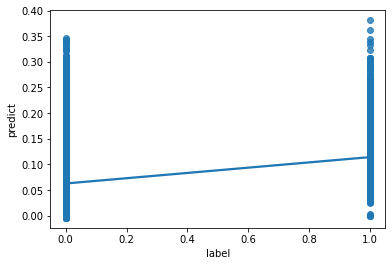

In [ ]:
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [ ]:
final_result

,label,predict
0,0.0,0.071008
1,0.0,0.000411
2,0.0,0.116627
3,0.0,-0.000091
4,0.0,0.002405
...,...,...
83644,0.0,0.179809
83645,0.0,0.000192
83646,0.0,0.060266
83647,0.0,0.001803


In [ ]:
LGBM_0=final_result[final_result['label']==0.0]
LGBM_1=final_result[final_result['label']==1.0]

In [ ]:
LGBM_0

,label,predict
0,0.0,0.071008
1,0.0,0.000411
2,0.0,0.116627
3,0.0,-0.000091
4,0.0,0.002405
...,...,...
83644,0.0,0.179809
83645,0.0,0.000192
83646,0.0,0.060266
83647,0.0,0.001803


In [ ]:
LGBM_1

,label,predict
32,1.0,0.068799
42,1.0,0.066638
47,1.0,0.035016
75,1.0,0.067191
99,1.0,0.041811
...,...,...
83588,1.0,0.142510
83589,1.0,0.039685
83614,1.0,0.151260
83619,1.0,0.140577


#Cluster

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f782f488950>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

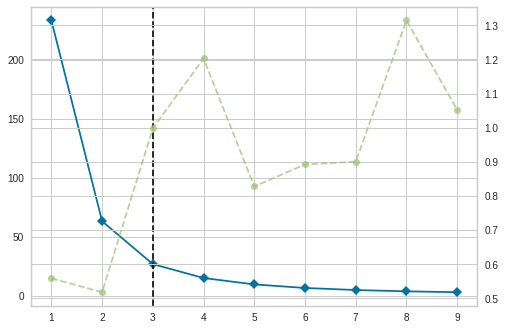

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(LGBM_0.drop(['label'], axis=1))

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(LGBM_0.drop(['label'], axis=1))

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
LGBM_0['cluster'] = model.fit_predict(LGBM_0.drop(['label'], axis=1))

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f782ea76750>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

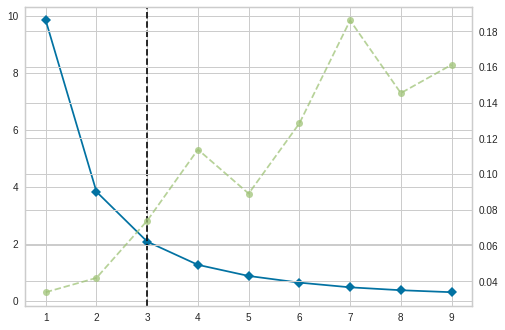

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(LGBM_1.drop(['label'], axis=1))

In [ ]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(LGBM_1.drop(['label'], axis=1))

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
LGBM_1['cluster'] = model.fit_predict(LGBM_1.drop(['label'], axis=1))

In [ ]:
LGBM_0.to_csv('./k_means0.csv')
LGBM_1.to_csv('./k_means1.csv')

In [ ]:
LGBM_0

,label,predict,cluster
0,0.0,0.071008,2
1,0.0,0.000411,0
2,0.0,0.116627,1
3,0.0,-0.000091,0
4,0.0,0.002405,0
...,...,...,...
83644,0.0,0.179809,1
83645,0.0,0.000192,0
83646,0.0,0.060266,2
83647,0.0,0.001803,0


In [ ]:
test_x

,P3,P4,E2,E3,EC,E1,P2,accommodation/food,C1,P6,fuel,entertainment/culture,trip/traffic,merchandise,B167,lightgbm
115119,1.0,1.0,0.166667,0.000000,0.000000,1.0,1.0,0.006220,0.004425,0.0,0.005316,0.033546,0.000000,0.007951,0.005023,NaN
257909,0.0,0.0,0.666667,0.000000,0.000203,1.0,0.4,0.015881,0.000000,1.0,0.000000,0.000000,0.016500,0.004552,0.001016,NaN
110166,1.0,1.0,0.083333,0.000000,0.002517,0.0,0.8,0.034013,0.004425,0.0,0.020466,0.003436,0.000000,0.000910,0.002052,NaN
91672,0.0,0.0,0.083333,0.083333,0.085880,0.0,0.6,0.032028,0.004425,0.0,0.000000,0.000000,0.000000,0.008498,0.008169,NaN
274553,0.0,1.0,0.000000,0.000000,0.023237,1.0,0.4,0.027528,0.022124,0.0,0.014176,0.011455,0.000667,0.009894,0.003088,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324214,1.0,1.0,0.416667,0.000000,0.001042,0.0,0.2,0.106803,0.026549,0.0,0.000000,0.020946,0.018167,0.002246,0.003772,NaN
160336,0.0,1.0,0.250000,0.166667,0.003941,1.0,0.6,0.040101,0.017699,0.0,0.026579,0.001636,0.000000,0.005766,0.003322,NaN
334649,1.0,0.0,0.083333,0.000000,0.000000,0.0,0.6,0.102303,0.000000,0.0,0.021263,0.000000,0.000000,0.003642,0.002287,NaN
300739,0.0,1.0,0.750000,0.000000,0.002441,0.0,0.8,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.005220,0.007055,NaN


In [ ]:
lst = test_x.index

In [ ]:
lst = lst.sort_values()

In [ ]:
final = target_df.copy()

In [ ]:
final

,P1,P2,P3,P4,P5,P6,P7,merchandise,EC,groceries,...,B167,C1,E1,E2,E3,E4,E5,E6,sum,target
0,0,2,1,1,0,0,1,386000,1182000,0,...,4350000,210,0,0,10,0,12,2,8440000,0
1,0,5,1,0,0,0,1,159000,152000,0,...,580000,40,0,0,0,0,11,1,1080000,0
2,0,4,1,1,0,0,1,296000,107000,2000,...,1950000,50,0,8,0,0,10,9,3700000,0
3,1,5,1,1,0,0,1,0,0,0,...,43000000,50,0,0,0,0,12,12,86001000,0
4,0,3,0,1,0,0,3,0,4870000,0,...,4910000,40,0,12,0,0,12,12,9821000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473216,0,3,0,0,0,1,3,36000,455000,0,...,540000,20,0,0,0,0,5,0,1071000,0
473217,0,4,1,0,0,0,1,81000,8000,0,...,550000,50,0,6,3,0,3,0,965000,0
473220,1,3,0,1,0,1,3,3000,516000,0,...,650000,30,12,4,0,0,11,8,1225000,0
473223,0,6,1,1,1,0,1,36000,797000,4000,...,1340000,50,0,3,0,0,12,10,2462000,1


In [ ]:
final = final.iloc[lst,:]

IndexError: ignored

In [ ]:
final.drop(['lightgbm'], axis=1, inplace=True)

In [ ]:
final

,P1,P2,P3,P4,P5,P6,P7,merchandise,EC,groceries,...,C1,E1,E2,E3,E4,E5,E6,sum,target,lightgbm
2,0,4,1,1,0,0,1,296000,107000,2000,...,50,0,8,0,0,10,9,3700000,0,0.0
7,0,2,0,0,0,0,3,16000,65000,0,...,20,0,4,0,0,7,3,893000,0,0.0
11,0,4,1,0,0,1,3,41000,0,0,...,100,0,0,0,0,10,3,1323000,0,0.0
25,1,5,1,0,0,1,3,227000,61000,21000,...,30,0,2,0,0,12,3,1016000,0,0.0
32,0,5,1,0,0,0,1,67000,0,0,...,20,0,8,3,0,11,3,1786000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473200,1,3,1,0,1,0,1,23000,305000,0,...,30,0,9,0,0,8,3,1026000,1,0.0
473217,0,4,1,0,0,0,1,81000,8000,0,...,50,0,6,3,0,3,0,965000,0,0.0
473220,1,3,0,1,0,1,3,3000,516000,0,...,30,12,4,0,0,11,8,1225000,0,0.0
473223,0,6,1,1,1,0,1,36000,797000,4000,...,50,0,3,0,0,12,10,2462000,1,0.0
